# **Actividad 2.2 Regresión Lineal y Múltiple**

## Carga de archivo, sustitución de valores nulos y atípicos

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Dataframe=pd.read_csv("DataAnalytics.csv")
print(Dataframe.isnull().sum())

Dataframe["botón correcto"]=Dataframe["botón correcto"].fillna(100) ###
Dataframe["tiempo de interacción"]=Dataframe["tiempo de interacción"].fillna(100)
Dataframe["mini juego"]=Dataframe["mini juego"].fillna(100)
Dataframe["número de interacción"]=Dataframe["número de interacción"].fillna(100)
Dataframe["color presionado"]=Dataframe["color presionado"].fillna(100)



Dataframe["auto push"]=Dataframe["auto push"].fillna(100)
Dataframe["tiempo de lección"]=Dataframe["tiempo de lección"].fillna(100)
Dataframe["tiempo de sesión"]=Dataframe["tiempo de sesión"].fillna(100)


Administrador              0
Usuario                    0
botón correcto           762
tiempo de interacción    762
mini juego               156
número de interacción    762
color presionado         762
dificultad                 0
fecha                      0
Juego                      0
auto push                762
tiempo de lección        177
tiempo de sesión         606
dtype: int64


## Convertir las variables categóricas ordinales (“Administrador”, “Usuario”, “mini juego”, “color presionado”, “dificultad” y “Juego”) en variables numéricas respecto a su frecuencia

In [2]:
frecuencias = Dataframe['Administrador'].value_counts()

# 2. Crear un diccionario de mapeo: nombre -> número según frecuencia
mapeo_numeros = {nombre: i+1 for i, (nombre, count) in enumerate(frecuencias.items())}

# 3. Aplicar el reemplazo en la columna
Dataframe['Administrador_cat'] = Dataframe['Administrador'].map(mapeo_numeros)

Dataframe['Administrador_cat'] = Dataframe['Administrador_cat'].astype(int)
print(frecuencias)


Administrador
ALEIDA            3260
nicolas            440
LEONARDO           371
DENISSE            302
SERGIO ANGEL       243
CARLOS ENRIQUE     228
YAEL DAVID         224
AUSTIN             199
VALENTIN           163
erick              158
IKER BENJAMIN      128
KYTZIA              98
BENJAMIN            51
Name: count, dtype: int64


In [3]:
frecuencias = Dataframe['Usuario'].value_counts()

# 2. Crear un diccionario de mapeo: nombre -> número según frecuencia
mapeo_numeros = {nombre: i+1 for i, (nombre, count) in enumerate(frecuencias.items())}

# 3. Aplicar el reemplazo en la columna
Dataframe['Usuario_cat'] = Dataframe['Usuario'].map(mapeo_numeros)

Dataframe['Usuario_cat'] = Dataframe['Usuario_cat'].astype(int)
print(frecuencias)

Usuario
LEONARDO              546
ALEIDA                487
nicolas               440
JOSE JAVIER           394
LEONARDO              371
JESUS ALEJANDRO       356
ramiro isai           332
ADRIAN                280
SERGIO ANGEL          243
DENISSE               228
CARLOS ENRIQUE        228
YAEL DAVID            224
VALENTIN              163
erick                 158
IKER BENJAMIN         152
NICOLAS |             128
ERICK OSVALDO         126
CONCEPCION            103
KYTZIA                 98
AUSTIN                 96
JOSE IGNACIO TADEO     94
JOSE IAN               86
ASHLEY                 75
JOSHUA                 74
YEREMI YAZMIN          71
MA DEL ROSARIO         64
BENJAMIN               51
INGRID                 49
RENE                   44
CARLOS ABEL            39
ARLETT                 29
ESMERALDA              24
IRVING                 10
jesus eduardo           2
Name: count, dtype: int64


In [4]:
frecuencias = Dataframe['mini juego'].value_counts()

# 2. Crear un diccionario de mapeo: nombre -> número según frecuencia
mapeo_numeros = {nombre: i+1 for i, (nombre, count) in enumerate(frecuencias.items())}

# 3. Aplicar el reemplazo en la columna
Dataframe['minijuego_cat'] = Dataframe['mini juego'].map(mapeo_numeros)

Dataframe['minijuego_cat'] = Dataframe['minijuego_cat'].astype(int)
print(frecuencias)

mini juego
Asteroides            1054
Restaurante            869
Estrellas              813
Gusanos                748
sonidos y animales     743
animales y colores     545
figuras y colores      400
partes del cuerpo      320
Despegue               196
100                    156
MiniGame_0               8
MiniGame_3               5
MiniGame_2               5
MiniGame_1               3
Name: count, dtype: int64


In [5]:
frecuencias = Dataframe['color presionado'].value_counts()

# 2. Crear un diccionario de mapeo: nombre -> número según frecuencia
mapeo_numeros = {nombre: i+1 for i, (nombre, count) in enumerate(frecuencias.items())}

# 3. Aplicar el reemplazo en la columna
Dataframe['color_cat'] = Dataframe['color presionado'].map(mapeo_numeros)

Dataframe['color_cat'] = Dataframe['color_cat'].astype(int)
print(frecuencias)

color presionado
violet    1361
green     1298
yellow    1233
blue      1182
100        762
red         29
Name: count, dtype: int64


In [6]:
frecuencias = Dataframe['dificultad'].value_counts()

# 2. Crear un diccionario de mapeo: nombre -> número según frecuencia
mapeo_numeros = {nombre: i+1 for i, (nombre, count) in enumerate(frecuencias.items())}

# 3. Aplicar el reemplazo en la columna
Dataframe['dificultad_cat'] = Dataframe['dificultad'].map(mapeo_numeros)

Dataframe['dificultad_cat'] = Dataframe['dificultad_cat'].astype(int)
print(frecuencias)

dificultad
Episodio 1    2357
Episodio 2    1493
Episodio 3    1292
Episodio 4     723
Name: count, dtype: int64


In [7]:
frecuencias = Dataframe['Juego'].value_counts()

# 2. Crear un diccionario de mapeo: nombre -> número según frecuencia
mapeo_numeros = {nombre: i+1 for i, (nombre, count) in enumerate(frecuencias.items())}

# 3. Aplicar el reemplazo en la columna
Dataframe['Juego_cat'] = Dataframe['Juego'].map(mapeo_numeros)

Dataframe['Juego_cat'] = Dataframe['Juego_cat'].astype(int)
print(frecuencias)

Juego
Astro      3799
Cadetes    2066
Name: count, dtype: int64


## Analizar las correlaciones lineales simples (“Heatmap”) que tiene la columna “Usuario” (variable dependiente u objetivo) con respecto a las demás variables numéricas.

Proponer un modelo lineal múltiple que supere la mejor correlación lineal simple encontrada para esta variable. Argumentar los hallazgos obtenidos en este punto.


In [8]:
Dataframe_num=Dataframe.select_dtypes(["int","float","int64","float64"])

Corr_factors=Dataframe_num.corr()
Corr_factors

,botón correcto,tiempo de interacción,número de interacción,auto push,tiempo de lección,tiempo de sesión,Administrador_cat,Usuario_cat,minijuego_cat,color_cat,dificultad_cat,Juego_cat
botón correcto,1.000000,0.905747,0.695736,0.999903,0.777888,0.519092,0.057365,0.096029,0.239281,0.623922,0.026733,0.031029
tiempo de interacción,0.905747,1.000000,0.804856,0.906857,0.705293,0.470648,0.023541,0.075269,0.233107,0.519724,-0.051112,0.057225
número de interacción,0.695736,0.804856,1.000000,0.698173,0.543191,0.362476,-0.079230,-0.111470,0.051290,0.314605,-0.086895,-0.089341
auto push,0.999903,0.906857,0.698173,1.000000,0.777961,0.519140,0.055089,0.093854,0.238387,0.624023,0.026596,0.030715
tiempo de lección,0.777888,0.705293,0.543191,0.777961,1.000000,0.482723,0.037559,0.088853,0.277685,0.485475,0.038854,0.055330
tiempo de sesión,0.519092,0.470648,0.362476,0.519140,0.482723,1.000000,0.037569,0.044588,0.259678,0.323962,0.089711,0.021554
Administrador_cat,0.057365,0.023541,-0.079230,0.055089,0.037559,0.037569,1.000000,0.351854,0.053984,0.041980,-0.099609,0.080074
Usuario_cat,0.096029,0.075269,-0.111470,0.093854,0.088853,0.044588,0.351854,1.000000,0.259280,0.073789,-0.054405,0.350355
minijuego_cat,0.239281,0.233107,0.051290,0.238387,0.277685,0.259678,0.053984,0.259280,1.000000,0.179507,-0.156931,0.625713
color_cat,0.623922,0.519724,0.314605,0.624023,0.485475,0.323962,0.041980,0.073789,0.179507,1.000000,0.027161,0.056677


<Axes: >

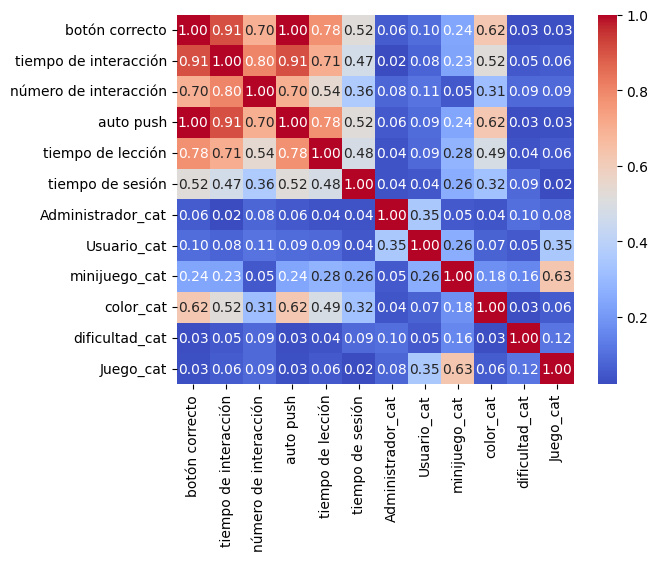

In [9]:
Dataframe_num=Dataframe.select_dtypes(["int","float","int64","float64"])

Corr_factors=Dataframe_num.corr()

#Obtener el valor absoluto
Corr_factors_abosluto=abs(Corr_factors)

#Ajustar el heatmap con los coeficientes de correlacion
Heat_map=sns.heatmap(Corr_factors_abosluto, cmap="coolwarm", annot=True, fmt=".2f")
Heat_map

### Proponer un modelo lineal múltiple que supere la mejor correlación lineal simple encontrada para esta variable. Argumentar los hallazgos obtenidos en este punto.

In [10]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= Dataframe_num[['Juego_cat', "Administrador_cat"]]
Var_Dep= Dataframe_num['Usuario_cat']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print(coef_Deter)

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)

print("Obtenemos un coeficiente más alto que los obtenidos en la regresión simple")
print(coef_Correl)
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación

0.2282716020867801
Obtenemos un coeficiente más alto que los obtenidos en la regresión simple
0.47777777479365874


## Generar un dataframe por cada “usuario” realizar un análisis comparativo entre los heatmap obtenidos para cada uno. 

Seleccionar una variable como objetivo y proponer un modelo de regresión multiple que supere las correlaciones obtenidas en los heatmap de cada usuario.

JOSE IAN, JOSE IGNACIO TADEO, JOSE JAVIER, JOSHUA, KYTZIA

<Axes: >

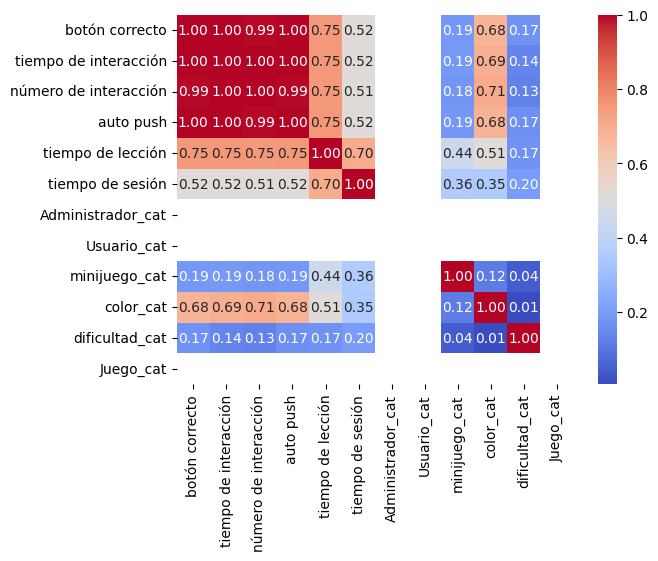

In [11]:
usuario=Dataframe[Dataframe["Usuario"]=="JOSE IAN"]
usuario=usuario.select_dtypes(["int","float","int64","float64"])

Corr_factors=usuario.corr()

#Obtener el valor absoluto
Corr_factors_absoluto=abs(Corr_factors)

#Ajustar el heatmap con los coeficientes de correlacion
Heat_map=sns.heatmap(Corr_factors_absoluto, cmap="coolwarm", annot=True, fmt=".2f")
Heat_map

<Axes: >

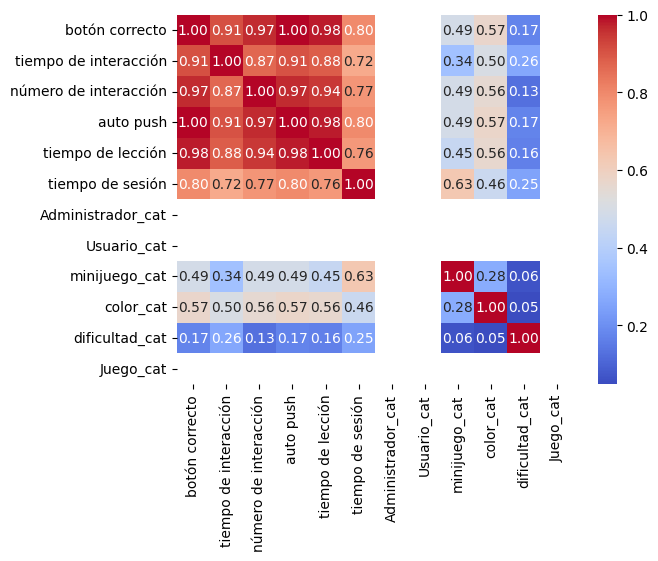

In [12]:
usuario=Dataframe[Dataframe["Usuario"]=="JOSE IGNACIO TADEO"]
usuario=usuario.select_dtypes(["int","float","int64","float64"])

Corr_factors=usuario.corr()

#Obtener el valor absoluto
Corr_factors_absoluto=abs(Corr_factors)

#Ajustar el heatmap con los coeficientes de correlacion
Heat_map=sns.heatmap(Corr_factors_absoluto, cmap="coolwarm", annot=True, fmt=".2f")
Heat_map

<Axes: >

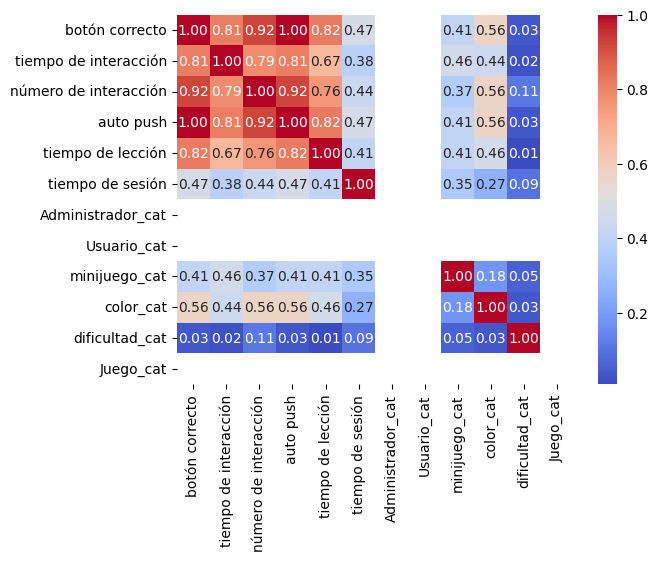

In [21]:
usuario=Dataframe[Dataframe["Usuario"]=="JOSE JAVIER "]
usuario=usuario.select_dtypes(["int","float","int64","float64"])

Corr_factors=usuario.corr()

#Obtener el valor absoluto
Corr_factors_absoluto=abs(Corr_factors)

#Ajustar el heatmap con los coeficientes de correlacion
Heat_map=sns.heatmap(Corr_factors_absoluto, cmap="coolwarm", annot=True, fmt=".2f")
Heat_map

<Axes: >

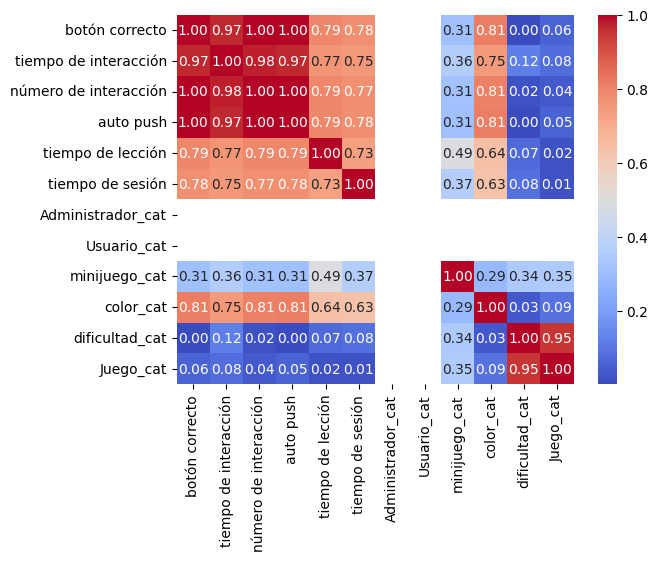

In [14]:
usuario=Dataframe[Dataframe["Usuario"]=="JOSHUA"]
usuario=usuario.select_dtypes(["int","float","int64","float64"])

Corr_factors=usuario.corr()

#Obtener el valor absoluto
Corr_factors_absoluto=abs(Corr_factors)

#Ajustar el heatmap con los coeficientes de correlacion
Heat_map=sns.heatmap(Corr_factors_absoluto, cmap="coolwarm", annot=True, fmt=".2f")
Heat_map

<Axes: >

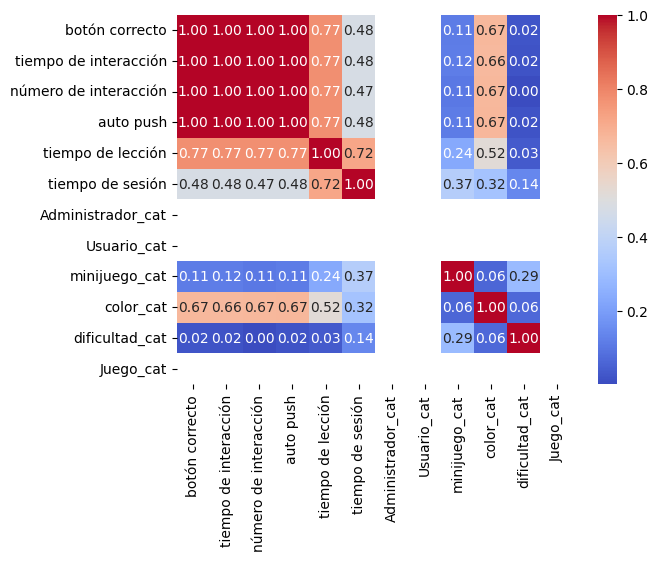

In [15]:
usuario=Dataframe[Dataframe["Usuario"]=="KYTZIA"]
usuario=usuario.select_dtypes(["int","float","int64","float64"])

Corr_factors=usuario.corr()

#Obtener el valor absoluto
Corr_factors_absoluto=abs(Corr_factors)

#Ajustar el heatmap con los coeficientes de correlacion
Heat_map=sns.heatmap(Corr_factors_absoluto, cmap="coolwarm", annot=True, fmt=".2f")
Heat_map